<div class="alert alert-danger"># Research questions:</div>


<div class="alert alert-warning">#### Question 1: What was the best month for sales? How much was earned that month? </div>
<div class="alert alert-warning">#### #### Question 2: What city sold the most product? </div>
<div class="alert alert-warning">#### #### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product? </div>
<div class="alert alert-warning">#### Question 4: What products are most often sold together? </div>
<div class="alert alert-warning">#### Question 5: What product sold the most? Why do you think it sold the most?</div> 

In [1]:
import os
import pandas as pd

<div class="alert alert-success"># Merging 12 months sales data into 1 file</div>



In [2]:
path = "./Sales_Data"
data = os.listdir(path)
data

['Sales_December_2019.csv',
 'Sales_April_2019.csv',
 'Sales_February_2019.csv',
 'Sales_March_2019.csv',
 'Sales_August_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_January_2019.csv',
 'Sales_September_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv']

In [3]:
file = [file for file in data if not file.startswith(".")]
file

['Sales_December_2019.csv',
 'Sales_April_2019.csv',
 'Sales_February_2019.csv',
 'Sales_March_2019.csv',
 'Sales_August_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_January_2019.csv',
 'Sales_September_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv']

In [4]:
all_month_data = pd.DataFrame()
for file in file:
    current_file = pd.read_csv(path + "/" + file)
    all_month_data = pd.concat([all_month_data, current_file])
    
all_month_data.to_csv("all_data.csv", index = False)    

<div class="alert alert-success">Read the file</div>


In [5]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [6]:
all_data.shape

(186850, 6)

In [7]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


<div class="alert alert-success">Checking null values.</div>


In [8]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [9]:
#Drop rows with null values
all_data = all_data.dropna(how='all')
all_data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [10]:
#We can also check if there is null values row wise
all_data[all_data.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


<div class="alert alert-success">Checking if columns contains specific text or irregular values </div>


In [11]:
all_data[all_data["Order Date"].str[0:2]=="Or"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
254,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
705,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1101,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2875,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3708,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
183671,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
184012,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
184041,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
184275,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


<div class="alert alert-success">Getting rid of those text values from Order Column</div>


In [12]:
all_data = all_data[all_data["Order Date"].str[0:2]!="Or"]

In [13]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


<div class="alert alert-warning"># Question 1: What was the best month for sales? How much was earned that month?  </div>


In [14]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


<div class="alert alert-success">### Replacing space with '_' for columns name for more readibility</div>



In [15]:
all_data.columns = all_data.columns.str.replace(" ", "_")
all_data.columns

Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address'],
      dtype='object')

### creating new column "month" and "total_sale"

In [16]:
all_data['Month'] = all_data['Order_Date'].str[0:2]
all_data.head()                                 

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [17]:
all_data["total_sales"] = all_data["Quantity_Ordered"].astype("int") * all_data["Price_Each"].astype("float")
all_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,total_sales
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


In [18]:
best_month_by_sales = all_data.groupby("Month").sum("total_sales")
best_month_by_sales

,total_sales
Month,
01,1822256.73
02,2202022.42
03,2807100.38
04,3390670.24
05,3152606.75
06,2577802.26
07,2647775.76
08,2244467.88
09,2097560.13


<div class="alert alert-success">## convering series into data frame and using it in seaborn bar plot</div>


In [30]:
bar_df = pd.DataFrame(best_month_by_sales)
bar_df = bar_df.reset_index()
bar_df

,Month,total_sales
0,01,1822256.73
1,02,2202022.42
2,03,2807100.38
3,04,3390670.24
4,05,3152606.75
5,06,2577802.26
6,07,2647775.76
7,08,2244467.88
8,09,2097560.13
9,10,3736726.88


In [24]:
import seaborn as sns


[Text(0.5, 1.0, 'Month wise sales')]

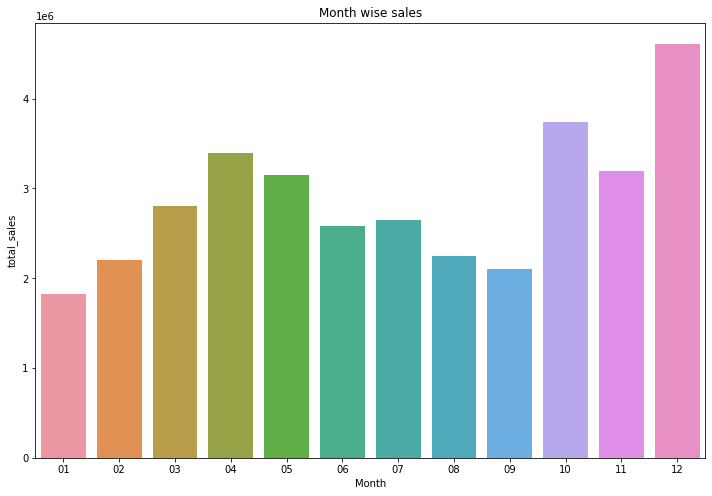

In [61]:
plt.figure(figsize=(12,8))
sns.barplot(x = 'Month' , y= 'total_sales', data = bar_df).set(title='Month wise sales')

### December month has more sales

<div class="alert alert-warning">## Question 2: What city sold the most product? </div>


In [46]:
all_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,total_sales
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


<div class="alert alert-info">###  first creating city column from Purchase_Address</div


In [53]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data["city"] = all_data["Purchase_Address"].apply(lambda x: f'{get_city(x)} ({get_state(x)})')
all_data


,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,total_sales,city
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)
...,...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",06,2.99,Boston (MA)
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",06,149.99,New York City (NY)
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",06,11.95,San Francisco (CA)
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",06,11.95,San Francisco (CA)


In [57]:
df_city = all_data.groupby("city").sum("total_sales")
df_city

,total_sales
city,
Atlanta (GA),2795498.58
Austin (TX),1819581.75
Boston (MA),3661642.01
Dallas (TX),2767975.40
Los Angeles (CA),5452570.80
New York City (NY),4664317.43
Portland (ME),449758.27
Portland (OR),1870732.34
San Francisco (CA),8262203.91


In [56]:
import matplotlib.pyplot as plt

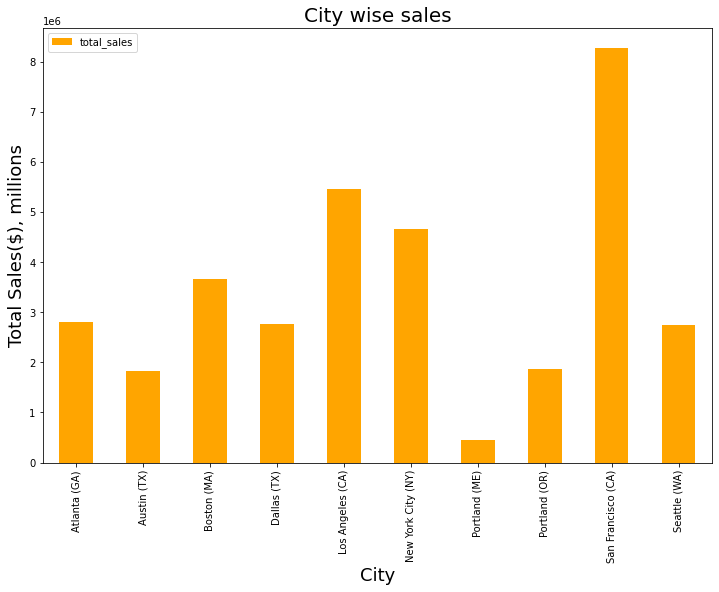

In [97]:
df_city.plot(kind="bar", figsize=(12,8), color="orange")
plt.xlabel("City", fontsize=18)
plt.ylabel("Total Sales($), millions",fontsize=18)
plt.title("City wise sales", fontsize=20)
plt.show()

<div class="alert alert-info">### San Francisco has more sales as compared to other cities</div


<div class="alert alert-warning"># Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?  </div>


In [62]:
all_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,total_sales,city
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


In [63]:
all_data["Hour"] = pd.to_datetime(all_data["Order_Date"]).dt.hour
all_data["Minute"] = pd.to_datetime(all_data["Order_Date"]).dt.minute
all_data["Count"]=1
all_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,total_sales,city,Hour,Minute,Count
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1,1
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3,1
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21,1
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13,1
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38,1


In [81]:
#all_data.groupby("Hour").Hour.count()
count_sales = all_data.groupby(["Hour"]).sum()["Count"]
count_sales

Hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Count, dtype: int64

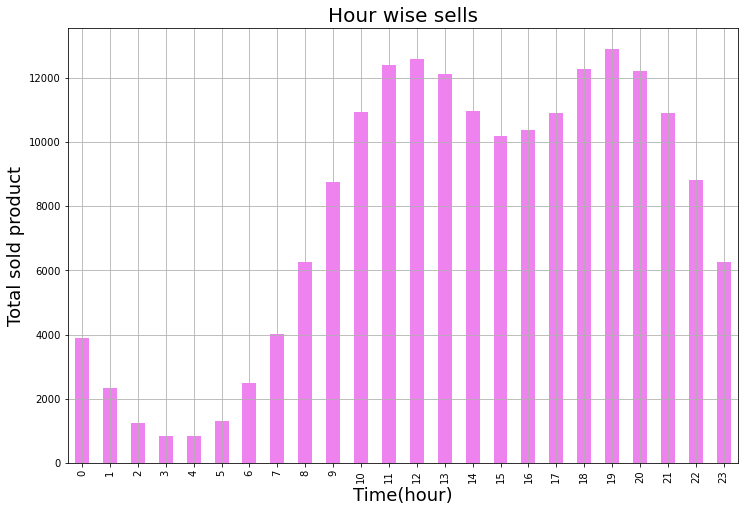

In [96]:
count_sales.plot(kind="bar", figsize=(12,8), color="violet", grid=True)
plt.xlabel("Time(hour)", fontsize=18)
plt.ylabel("Total sold product",fontsize=18)
plt.title("Hour wise sells",fontsize=20)
plt.show()

### Product sold most between (9-14) and between (17-21).

<div class="alert alert-warning"># Question 4: What products are most often sold together? </div>

In [120]:
all_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,total_sales,city,Hour,Minute,Count
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1,1
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3,1
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21,1
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13,1
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38,1


In [121]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order_ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity_Ordered  185950 non-null  object 
 3   Price_Each        185950 non-null  object 
 4   Order_Date        185950 non-null  object 
 5   Purchase_Address  185950 non-null  object 
 6   Month             185950 non-null  object 
 7   total_sales       185950 non-null  float64
 8   city              185950 non-null  object 
 9   Hour              185950 non-null  int64  
 10  Minute            185950 non-null  int64  
 11  Count             185950 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 18.4+ MB


In [122]:
all_data.nunique()


Order_ID            178437
Product                 19
Quantity_Ordered         9
Price_Each              23
Order_Date          142395
Purchase_Address    140787
Month                   12
total_sales             54
city                    10
Hour                    24
Minute                  60
Count                    1
dtype: int64

In [123]:
#Only taking duplicated orders
new_df = all_data[all_data["Order_ID"].duplicated(keep=False)]

#creating new columns and listing all the products with the same order ID in one line
new_df["Comb_Product"] = new_df.groupby("Order_ID")["Product"].transform(lambda x: ",".join(x))

new_df.head()

/var/folders/r7/32bm9v6164j0k8z2qvjcfrq40000gn/T/ipykernel_1336/3244280177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Comb_Product"] = new_df.groupby("Order_ID")["Product"].transform(lambda x: ",".join(x))


,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,total_sales,city,Hour,Minute,Count,Comb_Product
16,295681,Google Phone,1,600,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,600.00,Boston (MA),12,37,1,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
17,295681,USB-C Charging Cable,1,11.95,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,11.95,Boston (MA),12,37,1,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
18,295681,Bose SoundSport Headphones,1,99.99,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,99.99,Boston (MA),12,37,1,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
19,295681,Wired Headphones,1,11.99,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,11.99,Boston (MA),12,37,1,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,Vareebadd Phone,1,400,12/13/19 14:32,"175 1st St, New York City, NY 10001",12,400.00,New York City (NY),14,32,1,"Vareebadd Phone,USB-C Charging Cable"


In [125]:
#Comb_product contains duplicate values too since there in duplicates in the column Product. 
#So removing duplicates values

new_df = new_df[["Order_ID", "Comb_Product"]].drop_duplicates()
new_df.head()

,Order_ID,Comb_Product
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"


<div class="alert alert-info">### Now we will see with two products are sold most
### First we will import libraries itertools and collection libraries</div





In [126]:
from itertools import combinations
from collections import Counter

for i in range(2,4):
    count= Counter()

    for row in new_df["Comb_Product"]:
        row_list = row.split(",")
        count.update(Counter(combinations(row_list, i))) #count 2 combination product and 3 there after
    print(count.most_common(2))
    print()
 

[(('iPhone', 'Lightning Charging Cable'), 1005), (('Google Phone', 'USB-C Charging Cable'), 987)]

[(('Google Phone', 'USB-C Charging Cable', 'Wired Headphones'), 87), (('iPhone', 'Lightning Charging Cable', 'Wired Headphones'), 62)]



### we can see that When seeing 2 combination product iphone and Lightning together have 1005 transition
### where as 3 product combination have only 87 transition at most. So better would be to give deals in any of 
### the 3 combination product to increase the sell.

<div class="alert alert-warning"># Question 5: What product sold the most? Why do you think it sold the most?  </div>

In [185]:
all_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,total_sales,city,Hour,Minute,Count
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1,1
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3,1
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21,1
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13,1
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38,1


In [226]:
#Change data type of Quantity_Ordered
all_data["Quantity_Ordered"]= all_data["Quantity_Ordered"].astype("int")

#group by 
sold_df = all_data.groupby(["Product"])[["Quantity_Ordered"]].sum()

sold_df



,Quantity_Ordered
Product,
20in Monitor,4129
27in 4K Gaming Monitor,6244
27in FHD Monitor,7550
34in Ultrawide Monitor,6199
AA Batteries (4-pack),27635
AAA Batteries (4-pack),31017
Apple Airpods Headphones,15661
Bose SoundSport Headphones,13457
Flatscreen TV,4819


Text(0.5, 1.0, 'Product sales by quantity')

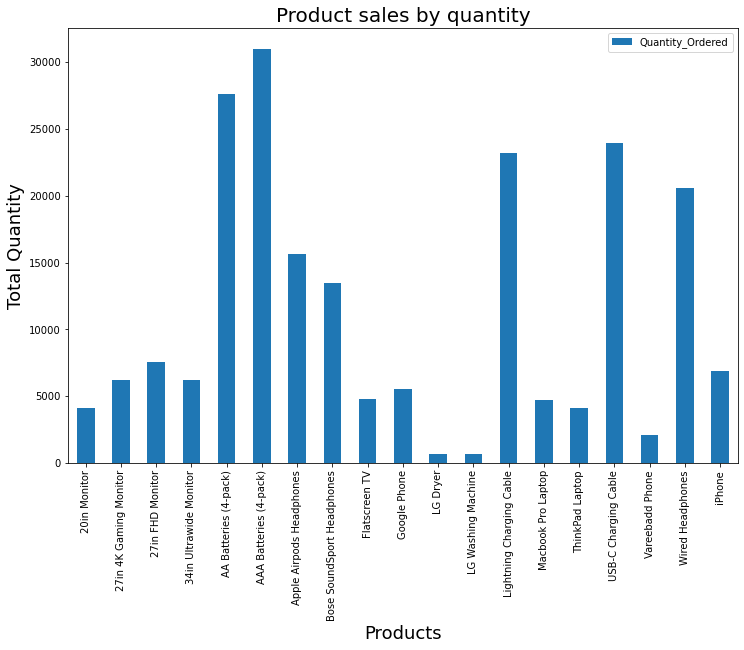

In [227]:
sold_df.plot(kind="bar", figsize=(12,8))
plt.xlabel("Products", fontsize=18)
plt.ylabel("Total Quantity", fontsize=18)
plt.title("Product sales by quantity", fontsize=20)

<div class="alert alert-info">###  AAA Batteries (4-pack) was most sold product</div


In [ ]:
### Now we will compare the sells quantity of the products with their respective prices.

In [228]:
all_data["Price_Each"] = all_data["Price_Each"].astype("float")
price_df = all_data.groupby(["Product"]).mean()[["Price_Each"]]

price_df


,Price_Each
Product,
20in Monitor,109.99
27in 4K Gaming Monitor,389.99
27in FHD Monitor,149.99
34in Ultrawide Monitor,379.99
AA Batteries (4-pack),3.84
AAA Batteries (4-pack),2.99
Apple Airpods Headphones,150.00
Bose SoundSport Headphones,99.99
Flatscreen TV,300.00


/var/folders/r7/32bm9v6164j0k8z2qvjcfrq40000gn/T/ipykernel_1336/3526336021.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(price_df.index, rotation='vertical', size=12)


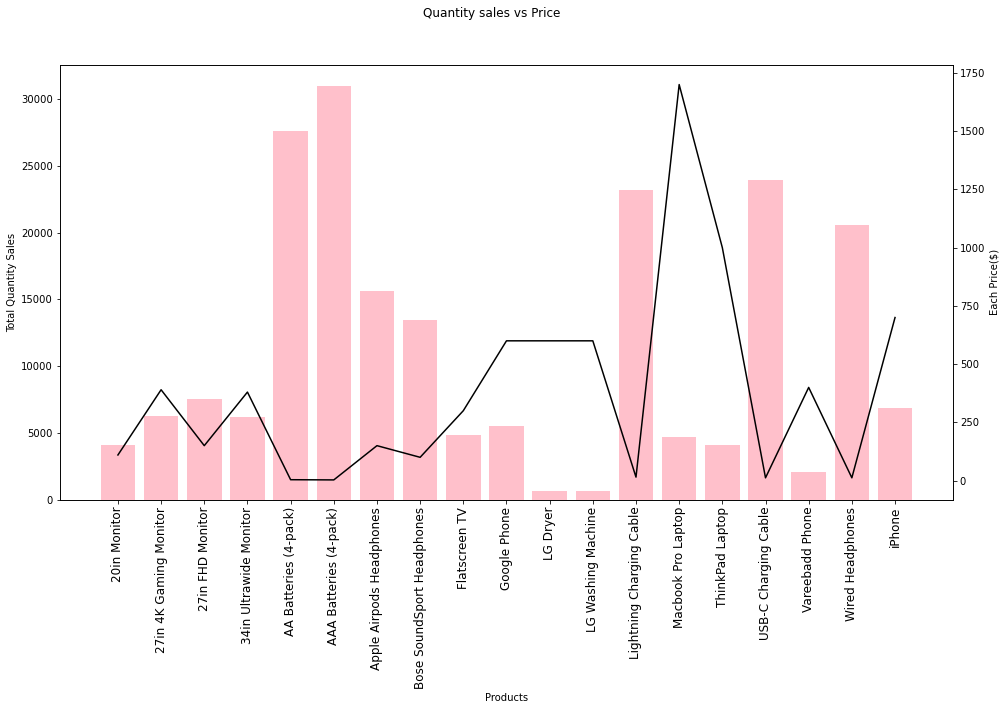

In [270]:
fig, ax1=plt.subplots(figsize=(16,8))
ax2 = ax1.twinx()

ax1.bar(sold_df.index, sold_df.Quantity_Ordered, color="Pink")
ax2.plot(price_df.index, price_df.Price_Each, color="black")


fig.suptitle("Quantity sales vs Price")

ax1.set_xlabel("Products")
ax1.set_ylabel("Total Quantity Sales")
ax2.set_ylabel("Each Price($)")

ax1.set_xticklabels(price_df.index, rotation='vertical', size=12)

plt.show()



<div class="alert alert-info">### From this it is clear that lower the price of the products the sell will be high, but exceptions are the laptops as laptops demand are high.</div